<a href="https://colab.research.google.com/github/arshad831/advancedpython/blob/main/eda_bigmart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) with the Bigmart Dataset

This notebook walks through the EDA steps for the Bigmart dataset, providing both the code and outputs for each step.


## 1. Loading the Dataset

Before diving into EDA, we need to load the dataset using pandas.


In [1]:
import pandas as pd

bigmart_data = pd.read_csv('bigmart_data.csv')
bigmart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 2. Overview of the Data

Get a quick summary of the dataset's structure, columns, data types, and basic statistics.


In [4]:
bigmart_data.info()
bigmart_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 3. Handling Missing Values

Detect and address missing values in the dataset.


In [3]:
# Detect missing values
missing_values = bigmart_data.isnull().sum()
missing_values

# Handle missing values (for example, impute or drop)
bigmart_data.fillna(bigmart_data.mean(), inplace=True)  # Impute numerical columns with mean


<ipython-input-3-cd30c4d0a49f>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bigmart_data.fillna(bigmart_data.mean(), inplace=True)  # Impute numerical columns with mean


## 4. Univariate Analysis

Analyze individual variables to understand their distribution and potential anomalies.


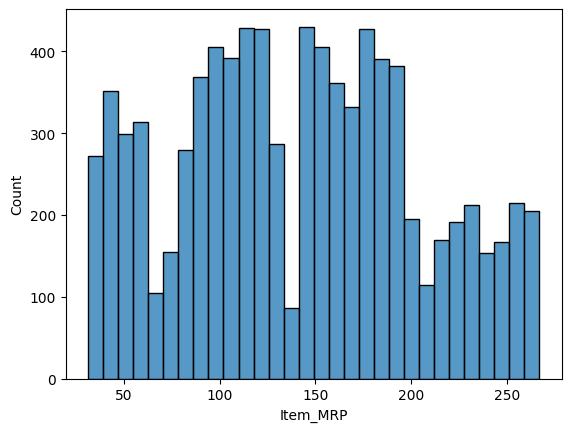

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for 'Item_Outlet_Sales'
sns.histplot(bigmart_data['Item_MRP'], bins=30)
plt.show()


## 5. Bivariate Analysis

Investigate and visualize relationships between two variables.


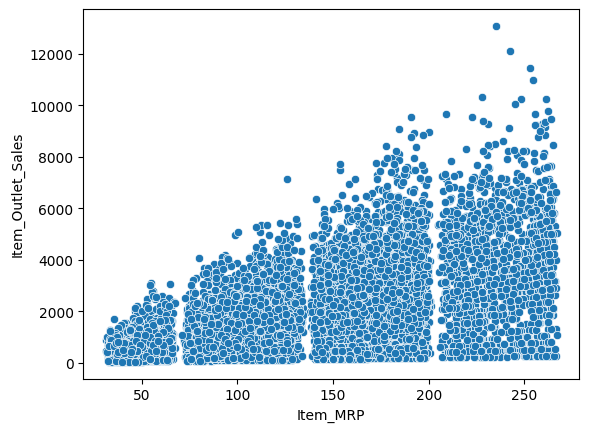

In [6]:
# Scatter plot for 'Item_MRP' vs 'Item_Outlet_Sales'
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=bigmart_data)
plt.show()


## 6. Correlation Analysis

Understand how different numerical variables relate to one another.


<ipython-input-10-cfef6f8d2777>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bigmart_data.corr()


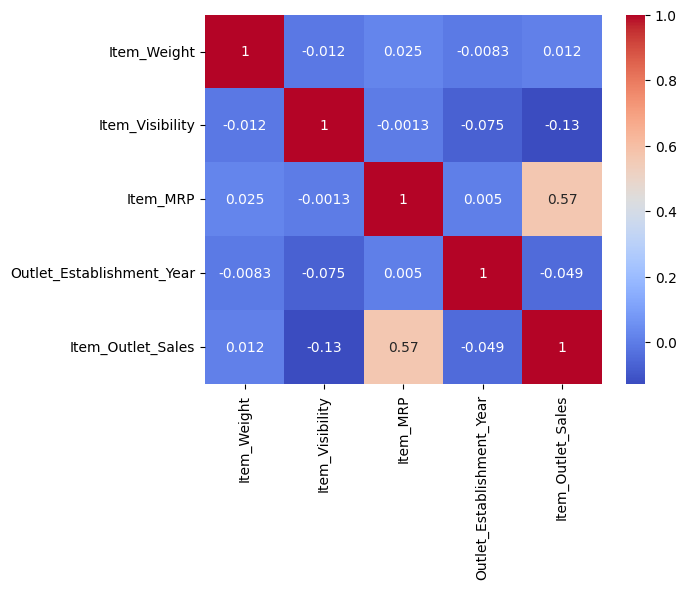

In [10]:
correlation_matrix = bigmart_data.corr()
sns.heatmap(correlation_matrix, annot=True , cmap = 'coolwarm')
plt.show()


## 7. Multivariate Analysis

Dive deeper into relationships and patterns among multiple variables.


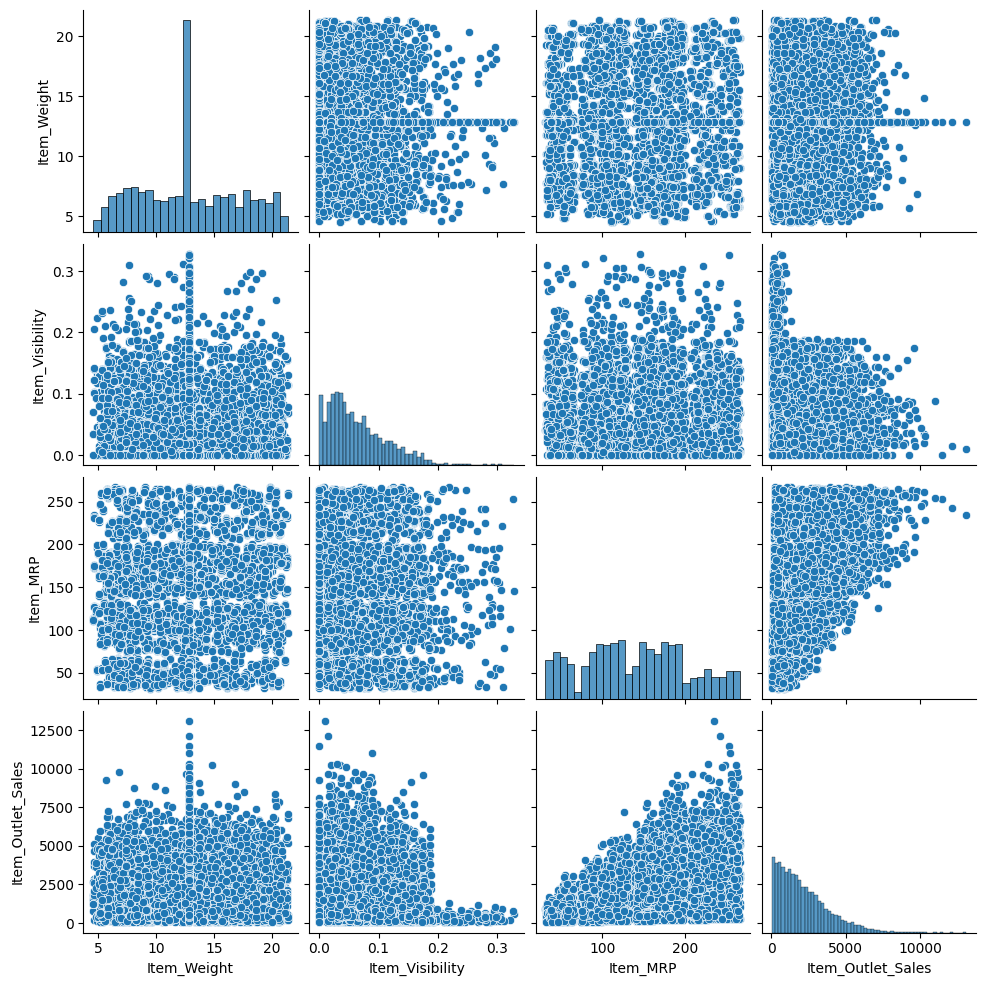

In [11]:
# Pair plot of select variables
subset_data = bigmart_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
sns.pairplot(subset_data)
plt.show()


## 8. Categorical Data Analysis

Understand the distribution and relationships of categorical data.


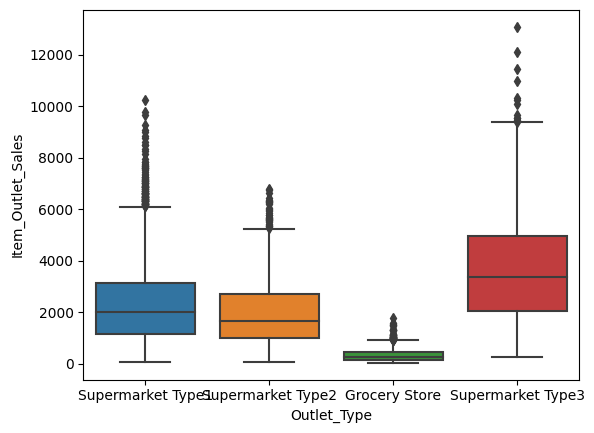

In [12]:
# Box plot for 'Outlet_Type' vs 'Item_Outlet_Sales'
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=bigmart_data)
plt.show()
